In [25]:
import pandas as pd

# Load the CSV
df = pd.read_csv(r'C:\Users\mdonn\Capstone\data\DatabankWide.csv')

# Check the first few rows
df.head()

,Country name,Country code,Year,Adult populaiton,Region,Income group,Account (% age 15+),Financial institution account (% age 15+),First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+),First financial institution account ever was opened to receive a wage payment (% age 15+),...,"Used a mobile phone or the internet to access an account, young (% ages 15-24)","Used a mobile phone or the internet to access an account, older (% age 25+)","Used a mobile phone or the internet to access an account, primary education or less (% ages 15+)","Used a mobile phone or the internet to access an account, secondary education or more (% ages 15+)","Used a mobile phone or the internet to access an account, income, poorest 40% (% ages 15+)","Used a mobile phone or the internet to access an account, income, richest 60% (% ages 15+)","Used a mobile phone or the internet to access an account, rural (% age 15+)","Used a mobile phone or the internet to access an account, urban (% age 15+)","Used a mobile phone or the internet to access an account, out of labor force (% age 15+)","Used a mobile phone or the internet to access an account, in labor force (% age 15+)"
0,Afghanistan,AFG,2011,15124473.0,South Asia,Low income,9%,9%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2014,17300802.0,South Asia,Low income,10%,10%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2017,19718214.0,South Asia,Low income,15%,15%,NaN,NaN,...,0%,1%,0%,2%,0%,1%,NaN,NaN,0%,2%
3,Afghanistan,AFG,2021,22647496.0,South Asia,Low income,10%,10%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,ALB,2011,2258900.0,Europe & Central Asia (excluding high income),Upper middle income,28%,28%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print("Shape of dataset:", df.shape)
print("Column names:")
print(df.columns.tolist())

Shape of dataset: (658, 1232)
Column names:
['Country name', 'Country code', 'Year', 'Adult populaiton', 'Region', 'Income group', 'Account (% age 15+)', 'Financial institution account (% age 15+)', 'First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)', 'First financial institution account ever was opened to receive a wage payment (% age 15+)', 'First financial institution ever account was opened to receive money from the government (% age 15+)', 'Owns a credit card (% age 15+)', 'Used a credit card (% age 15+)', 'Used a credit card: in-store (% age 15+)', 'Used a credit card: in-store (% who used a credit card, age 15+)', 'Paid off all credit card balances in full by their due date (% age 15+)', 'Paid off all credit card balances in full by their due date (% who used a credit card, age 15+)', 'Owns a debit card (% age 15+)', 'Used a debit card (% age 15+)', 'Used a debit card in-store (% age 15+)', 'Used a debit card: 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Columns: 1232 entries, Country name to Used a mobile phone or the internet to access an account, in labor force (% age 15+)
dtypes: float64(17), int64(1), object(1214)
memory usage: 6.2+ MB


In [28]:
df.isnull().sum().sort_values(ascending=False)

Paid school fees, urban (% age 15+)                                            658
Saved for education or school fees, urban (% age 15+)                          658
Borrowed from a store by buying on credit, urban (% age 15+)                   658
Borrowed to start, operate, or expand a farm or business, rural (% age 15+)    658
Borrowed to start, operate, or expand a farm or business, urban (% age 15+)    658
                                                                              ... 
Borrowed from family or friends, young (% ages 15-24)                            1
Borrowed from family or friends, older (% age 25+)                               1
Year                                                                             0
Country code                                                                     0
Country name                                                                     0
Length: 1232, dtype: int64

In [29]:
# Drop columns with 100% missing values
df_cleaned = df.dropna(axis=1, how='all').copy()

# Check new shape
print("New shape:", df_cleaned.shape)

New shape: (658, 1216)


In [30]:
# Recalculate missing values for remaining columns
missing_after = df_cleaned.isnull().sum()
missing_after[missing_after > 0].sort_values(ascending=False).head(10)

Reason for not using their inactive account: bank or financial institution is too far away (% age 15+)                                      653
Reason for not using their inactive account: don't trust banks or financial institutions (% with an inactive account, age 15+)              653
Reason for not using their inactive account: don't trust banks or financial institutions (% age 15+)                                        653
Reason for not using their inactive account: don't feel comfortable using an account by themselves (% with an inactive account, age 15+)    653
Reason for not using their inactive account: don't feel comfortable using the account by themselves (% age 15+)                             653
Reason for not using their inactive account: don't have enough money to use an account (% with an inactive account, age 15+)                653
Reason for not using their inactive account: don't have enough money to use an account (% age 15+)                                      

In [31]:
#Code to find relevant columns to use as a behavioural proxy
# Convert all column names to lowercase for easier search
cols = df_cleaned.columns.str.lower()

# Keywords to search for
keywords = ['account', 'save', 'borrow', 'loan', 'emergency', 'mobile', 'digital']

# Find matching columns
proxy_candidates = [col for col in cols if any(keyword in col for keyword in keywords)]

# Display matches
print(f"Found {len(proxy_candidates)} possible proxy columns:\n")
for col in proxy_candidates:
    print(col)

Found 693 possible proxy columns:

account (% age 15+)
financial institution account (% age 15+)
first financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
first financial institution account ever was opened to receive a wage payment (% age 15+)
first financial institution ever account was opened to receive money from the government (% age 15+)
used a mobile phone or the internet to check account balance (% age 15+)
used a mobile phone or the internet to check account balance (% with a financial institution account, age 15+)
use a mobile phone or the internet to make payments, buy things, or to send or receive money using a financial institution account (% age 15+)
use a mobile phone or the internet to make payments, buy things, or to send or receive money using a financial institution account (% with a financial institution account, age 15+)
made a deposit (% with a financial institution account, age 15+)
has an inactive acco

In [32]:
# List of selected proxy columns
proxy_columns = [
    'Account (% age 15+)',
    'Saved any money (% age 15+)',
    'Mobile money account (% age 15+)',
    'Made or received a digital payment (% age 15+)',
    'Coming up with emergency funds in 30 days: possible (% age 15+)',
    'Borrowed from a formal financial institution (% age 15+)'
]

# Check which are present
present = [col for col in proxy_columns if col in df_cleaned.columns]
missing = [col for col in proxy_columns if col not in df_cleaned.columns]

print("Found:", present)
print("Missing or misspelled:", missing)


Found: ['Account (% age 15+)', 'Saved any money (% age 15+)', 'Mobile money account (% age 15+)', 'Made or received a digital payment (% age 15+)', 'Coming up with emergency funds in 30 days: possible (% age 15+)', 'Borrowed from a formal financial institution (% age 15+)']
Missing or misspelled: []


In [34]:
#Create financial literacy proxy variable
# List of selected behaviour columns
proxy_columns = [
    'Account (% age 15+)',
    'Saved any money (% age 15+)',
    'Mobile money account (% age 15+)',
    'Made or received a digital payment (% age 15+)',
    'Coming up with emergency funds in 30 days: possible (% age 15+)',
    'Borrowed from a formal financial institution (% age 15+)'
]

# Step 1: Remove '%' and convert to numeric values (0.00 to 1.00)
for col in proxy_columns:
    # Only apply .str.replace if the column is of type object (i.e., string)
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col] = df_cleaned[col].str.replace('%', '', regex=False)

    # Convert to numeric and scale
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce') / 100

# Step 2: Compute the average proxy score across the selected columns
df_cleaned['financial_literacy_proxy'] = df_cleaned[proxy_columns].mean(axis=1)


In [35]:
#create classification target
# Create a binary target: 1 = High literacy, 0 = Low literacy
threshold = df_cleaned['financial_literacy_proxy'].median()
df_cleaned['financial_literacy_class'] = (df_cleaned['financial_literacy_proxy'] > threshold).astype(int)


In [36]:
# Look at a sample
df_cleaned[['financial_literacy_proxy', 'financial_literacy_class']].head()

# Check balance of classes
df_cleaned['financial_literacy_class'].value_counts()


financial_literacy_class
0    330
1    328
Name: count, dtype: int64

In [37]:
df_cleaned.columns[:20]  # preview the first 20 columns


Index(['Country name', 'Country code', 'Year', 'Adult populaiton', 'Region',
       'Income group', 'Account (% age 15+)',
       'Financial institution account (% age 15+)',
       'First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)',
       'First financial institution account ever was opened to receive a wage payment (% age 15+)',
       'First financial institution ever account was opened to receive money from the government (% age 15+)',
       'Owns a credit card (% age 15+)', 'Used a credit card (% age 15+)',
       'Used a credit card: in-store (% age 15+)',
       'Used a credit card: in-store (% who used a credit card, age 15+)',
       'Paid off all credit card balances in full by their due date (% age 15+)',
       'Paid off all credit card balances in full by their due date (% who used a credit card, age 15+)',
       'Owns a debit card (% age 15+)', 'Used a debit card (% age 15+)',
       'Used a debit ca

In [43]:
# Rename the column
df_cleaned.rename(columns={'Adult populaiton': 'Adult population'}, inplace=True)

In [44]:
drop_cols = [
    'Country name', 'Country code', 'Region', 'Income group',
    'Year', 'Adult population',
    'financial_literacy_proxy', 'financial_literacy_class'  # don’t use targets as inputs
]


In [45]:
# Create input matrix X and target vector y
X = df_cleaned.drop(columns=drop_cols)
y = df_cleaned['financial_literacy_class']


In [46]:
#Spliting the data for training and testing
from sklearn.model_selection import train_test_split

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (526, 1210)
Test set size: (132, 1210)


In [51]:
#Strip % signs and convert to numbers column by column
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].map(lambda x: str(x).replace('%', '') if isinstance(x, str) else x)
        X[col] = pd.to_numeric(X[col], errors='coerce')

In [56]:
#scaling the data for linear regression
# Step 1: Clean the entire X DataFrame (remove % and convert to numeric)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].map(lambda x: str(x).replace('%', '') if isinstance(x, str) else x)
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Step 2: Drop columns with all missing values after conversion
X = X.dropna(axis=1, how='all')
# Fill remaining NaNs with the column mean
X = X.fillna(X.mean(numeric_only=True))

# Step 3: Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Scale the numeric values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [57]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train shape: (526, 1210)
X_test shape: (132, 1210)
X_train_scaled shape: (526, 1210)
X_test_scaled shape: (132, 1210)


In [58]:
import numpy as np

print("Any NaNs in X_train_scaled?", np.isnan(X_train_scaled).any())
print("Any NaNs in X_test_scaled?", np.isnan(X_test_scaled).any())


Any NaNs in X_train_scaled? False
Any NaNs in X_test_scaled? False


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94        66
           1       0.98      0.88      0.93        66

    accuracy                           0.93       132
   macro avg       0.94      0.93      0.93       132
weighted avg       0.94      0.93      0.93       132

Confusion Matrix:
[[65  1]
 [ 8 58]]


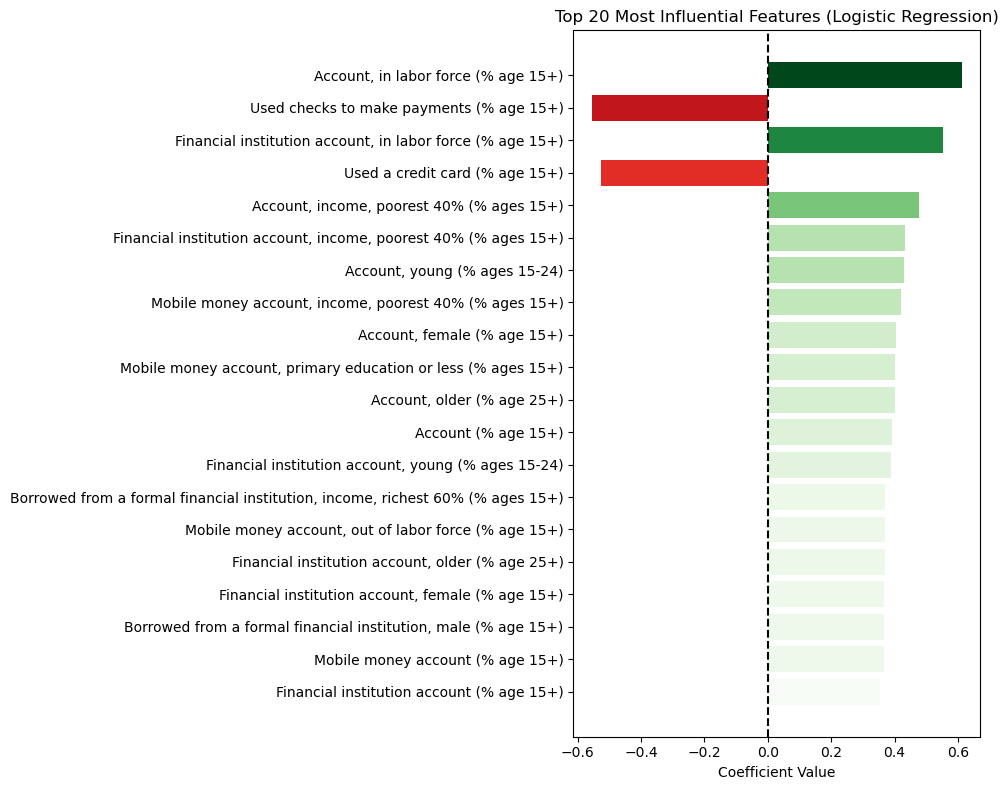

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort top 20 by absolute coefficient value
coef_df_sorted = coef_df.sort_values(by='AbsCoef', ascending=False).head(20)

# Normalize influence: 0 = most important, 1 = least important
rank_norm = (
    (coef_df_sorted['AbsCoef'] - coef_df_sorted['AbsCoef'].min()) /
    (coef_df_sorted['AbsCoef'].max() - coef_df_sorted['AbsCoef'].min())
)

# Generate palettes: darkest = most important (we reverse it!)
greens = sns.color_palette("Greens", n_colors=100)[::-1]
reds = sns.color_palette("Reds", n_colors=100)[::-1]

# Assign colours based on sign and rank (invert rank to flip intensity)
colors = []
for coef, norm_rank in zip(coef_df_sorted['Coefficient'], rank_norm):
    # Invert the rank so 0 = most important = index 0 = darkest
    idx = int((1 - norm_rank) * 99)
    color = greens[idx] if coef >= 0 else reds[idx]
    colors.append(color)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(
    coef_df_sorted['Feature'],
    coef_df_sorted['Coefficient'],
    color=colors
)
plt.axvline(0, color='black', linestyle='--')
plt.title("Top 20 Most Influential Features (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.savefig("logistic_top20_features.png", dpi=300, bbox_inches='tight')
plt.show()


In [82]:
import os
print(os.getcwd())

C:\Users\mdonn\Capstone


In [63]:
##Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    class_weight='balanced'  # helps in case of slight class imbalance
)
rf.fit(X_train, y_train)  # Random Forest does NOT need scaled data

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        66
           1       0.97      0.91      0.94        66

    accuracy                           0.94       132
   macro avg       0.94      0.94      0.94       132
weighted avg       0.94      0.94      0.94       132

Confusion Matrix:
[[64  2]
 [ 6 60]]


In [66]:
!pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ------------ --------------------------- 92.2/294.9 kB 1.3 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00


C:\Users\mdonn\AppData\Local\Temp\ipykernel_2828\1996583694.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


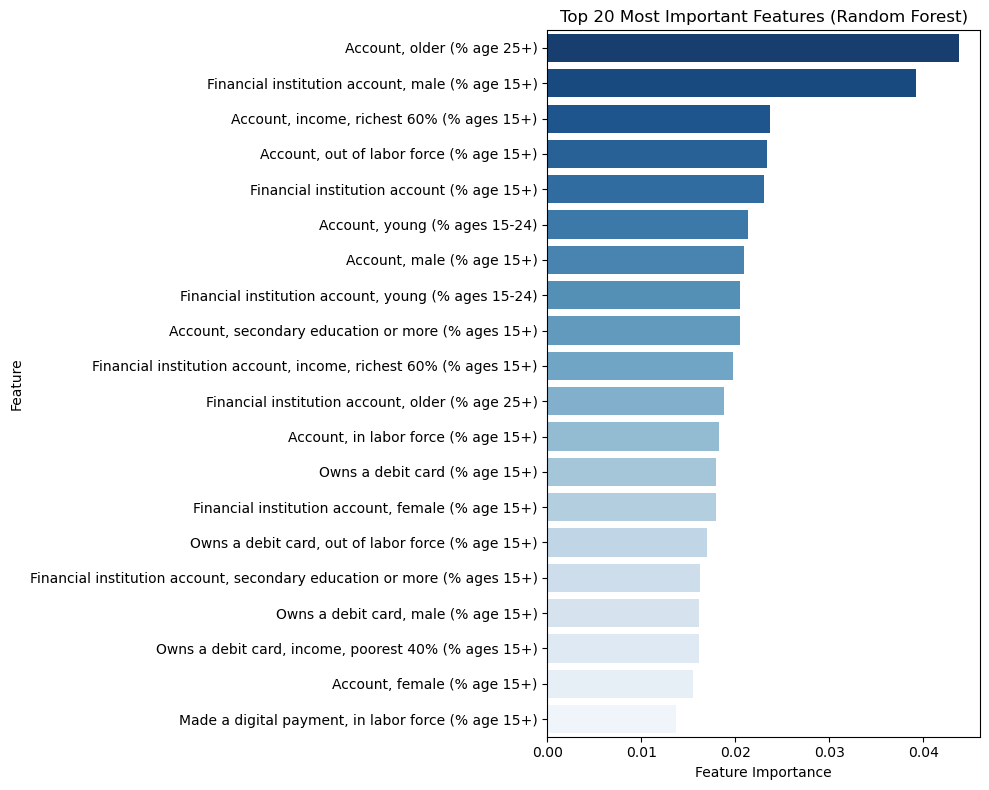

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort top 20
top_rf = rf_importances.sort_values(by='Importance', ascending=False).head(20)

# Create a reversed 20-colour Blues palette
reversed_blues = sns.color_palette("Blues", n_colors=20)[::-1]

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_rf,
    y='Feature',
    x='Importance',
    palette=reversed_blues
)
plt.title('Top 20 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig("randomforest_top20_features.png", dpi=300, bbox_inches='tight')
plt.show()


In [84]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 919.0 kB/s eta 0:02:44
   ---------------------------------------- 0.2/150.0 MB 1.5 MB/s eta 0:01:42
   ---------------------------------------- 0.6/150.0 MB 3.3 MB/s eta 0:00:46
   ---------------------------------------- 1.7/150.0 MB 7.9 MB/s eta 0:00:19
   - -------------------------------------- 4.1/150.0 MB 14.4 MB/s eta 0:00:11
   - -------------------------------------- 6.3/150.0 MB 19.1 MB/s eta 0:00:08
   -- ------------------------------------- 8.7/150.0 MB 23.2 MB/s eta 0:00:07
   -- ------------------------------------- 11.1/150.0 MB 43.7 MB/s eta 0:00:04
   --- ------------------------------------ 13.6/150.0 MB 46.7 MB/s eta 0:00:03
   ---- ----------------------------------- 16.3/150.0 MB 50.4 MB/s eta 0:00:03
   ----- ---------------------------------- 19.0/150.0 MB 54.4 MB/s

In [87]:
#Train and evaluate XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the XGBoost model
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)  # No scaling required

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        66
           1       0.98      0.89      0.94        66

    accuracy                           0.94       132
   macro avg       0.94      0.94      0.94       132
weighted avg       0.94      0.94      0.94       132

Confusion Matrix:
[[65  1]
 [ 7 59]]


In [88]:
!pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ------ --------------------------------- 81.9/545.3 kB 4.8 MB/s eta 0:00:01
   ------------------------------ --------- 409.6/545.3 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 545.3/545.3 kB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --------------- ------------------------ 1.1/2.8 MB 34.9 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 36.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   -- ------------------------------------- 1.6/30.3 MB 34.6 MB/s eta 0:00:01
   ---- ----------------------------------- 3.7/30.3 MB 40.0 MB/s eta 0:00:01
   -------- ------------------------------- 6.4/30.3 MB 45.3 MB/s eta 0:00:01
   ----------- ---------------------------- 8.9/30.3 MB 47.7 MB/s eta 0:00:01
   --------------- ------------------------ 12.1/30.3 MB 50.4 MB/s eta 0:00:01
   ---

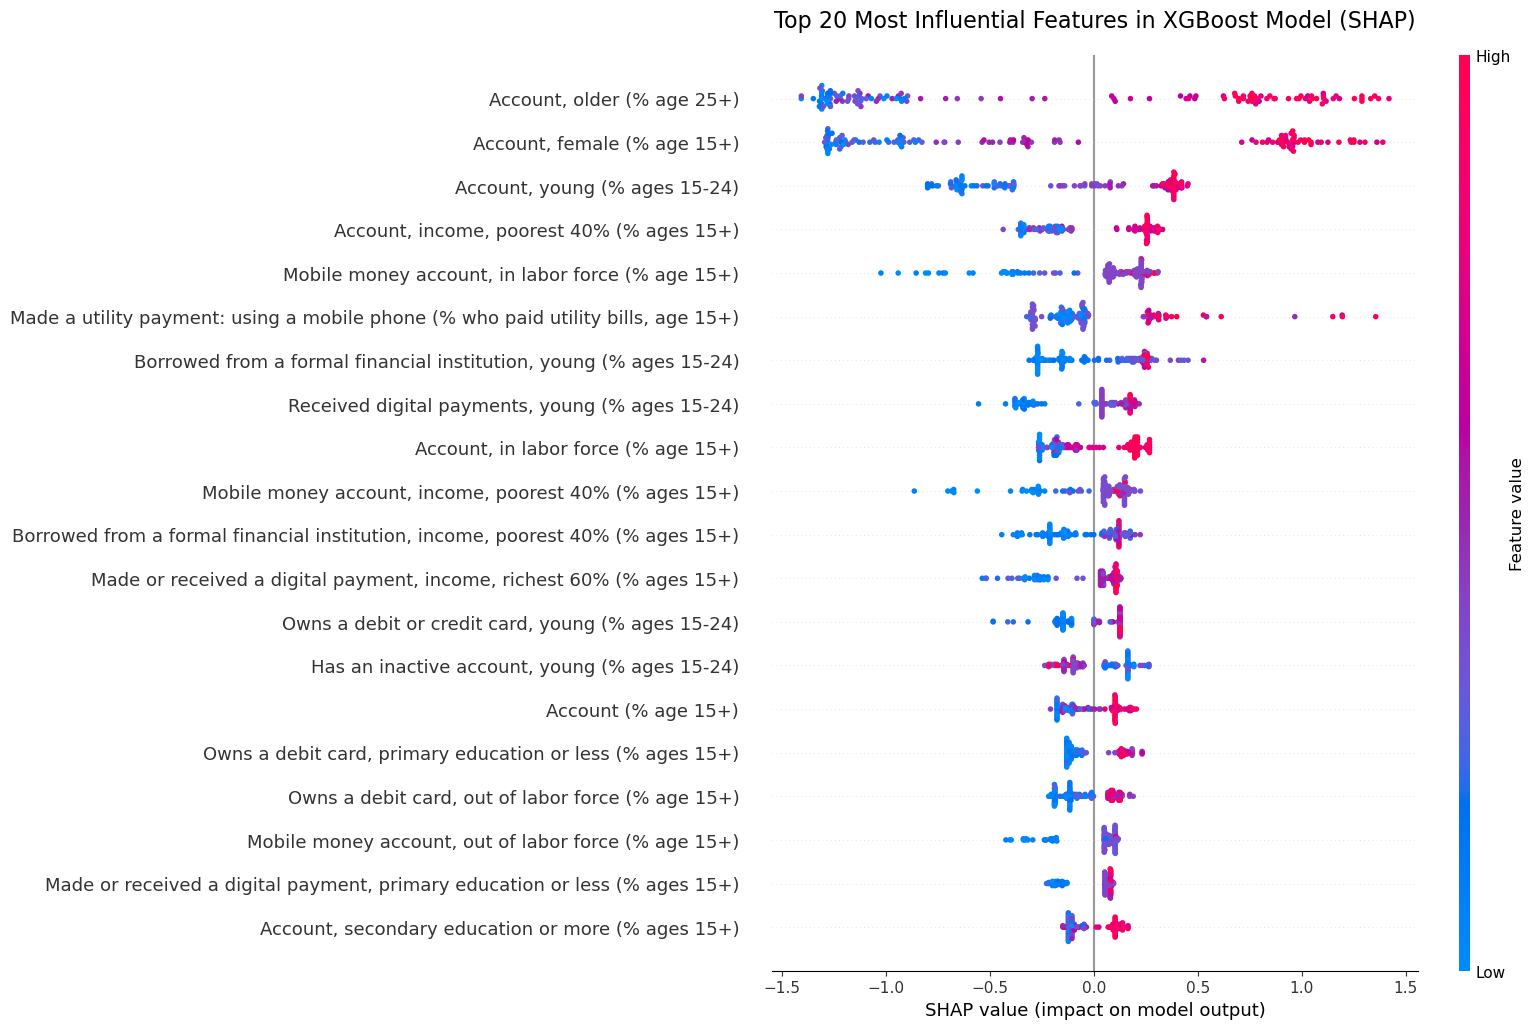

In [95]:
import shap
import matplotlib.pyplot as plt

# Create a summary plot with a wide size and capture the figure
plt.figure()  # this clears any active figure
shap.summary_plot(
    shap_values,
    X_test,
    max_display=20,
    plot_size=(16, 10),
    show=False  # prevent it from showing too early
)

# Get current axes and add title
plt.gca().set_title("Top 20 Most Influential Features in XGBoost Model (SHAP)", fontsize=16, pad=20)

# Save or display
plt.savefig("shap_summary_xgb_with_title.png", dpi=300, bbox_inches='tight')
plt.show()


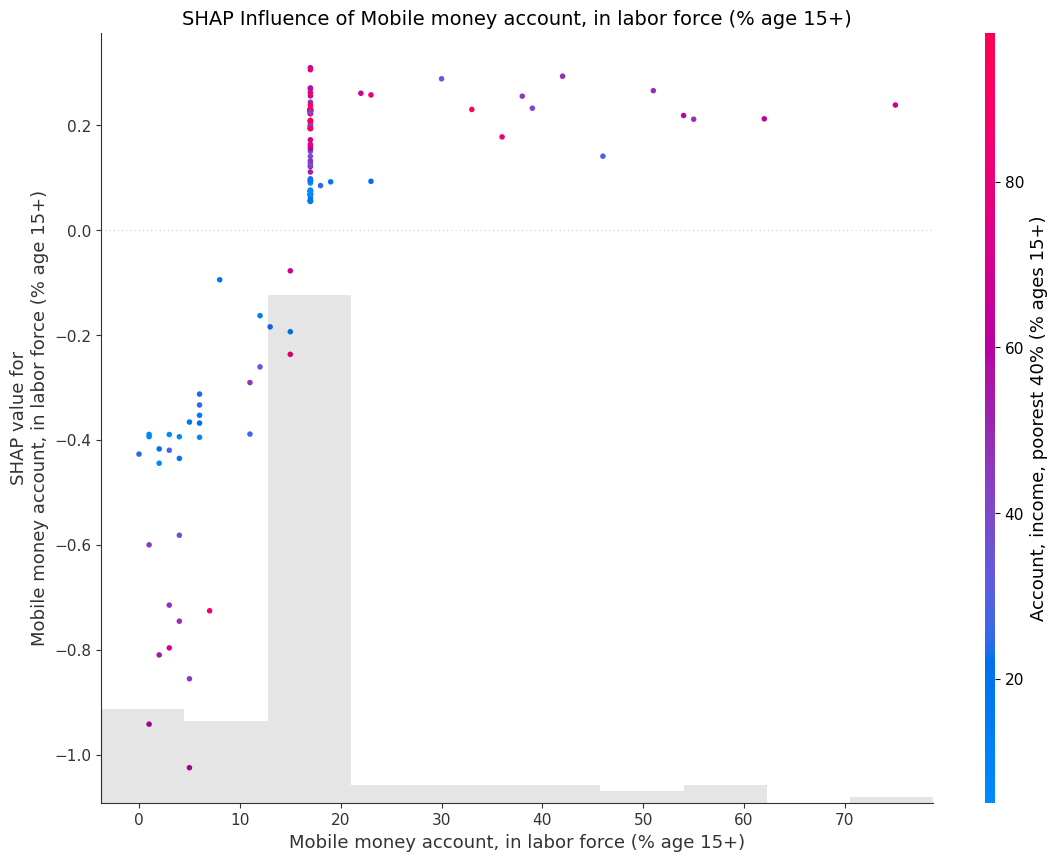

In [103]:
import shap
import matplotlib.pyplot as plt

# Create the SHAP scatter plot for the feature
shap.plots.scatter(
    shap_values[:, "Mobile money account, in labor force (% age 15+)"],
    color=shap_values,
    show=False  # don't render yet
)

# Adjust plot layout to make space for long y-axis label
plt.gcf().set_size_inches(16, 10)
plt.subplots_adjust(left=0.25)  # ← increase left margin to fit y-axis label

# Add title
plt.title("SHAP Influence of Mobile money account, in labor force (% age 15+)", fontsize=14)

# Save or display
plt.savefig("shap_dependence_account5.png", dpi=300, bbox_inches='tight')
plt.show()


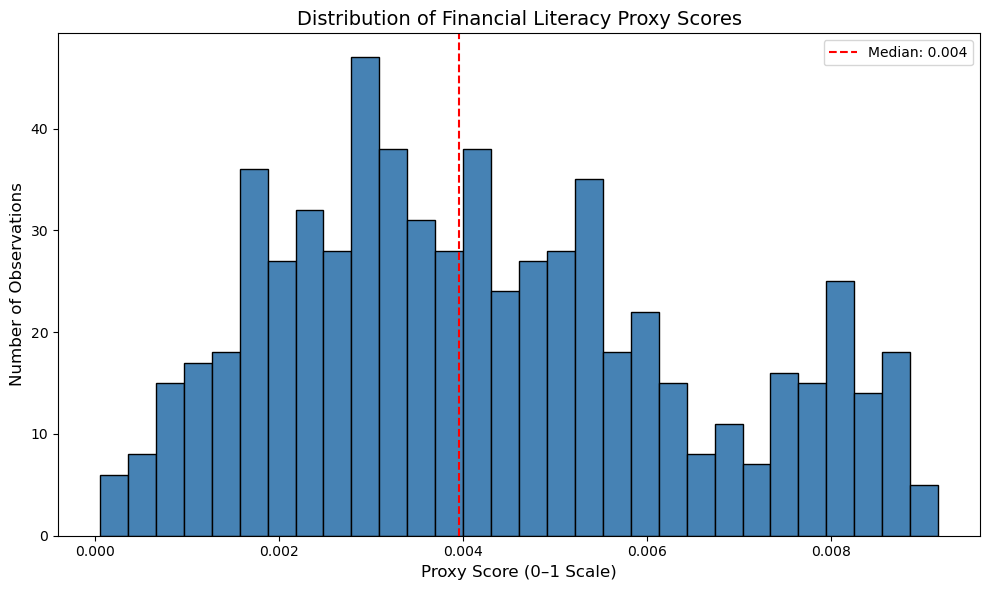

In [107]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['financial_literacy_proxy'], bins=30, color='steelblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Financial Literacy Proxy Scores', fontsize=14)
plt.xlabel('Proxy Score (0–1 Scale)', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)

# Add median line
median_score = df_cleaned['financial_literacy_proxy'].median()
plt.axvline(median_score, color='red', linestyle='--', label=f'Median: {median_score:.3f}')
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig("FinLitProxyScoresDist.png", dpi=300, bbox_inches='tight')
plt.show()
